# Image Processing with Python: Image Warping using Homography Matrix

by: Jephraim C. Manansala | Published on https://jephraim-manansala.medium.com/

### How can we get a different perspective on images?

In this post, we will learn how we can apply the homography matrix to adjust the camera perspective in images.

Let’s begin.

As usual, we import libraries such as numpy,and matplotlib. Additionally, we import specific functions from the skimage library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import transform

Let’s first define what a **homography** is. In computer vision, homography is a transformation matrix in a homogenous coordinates space that is mapped between two planar projections of an image. These transformations can be a combination of rotation, translation, scaling, or skew operations.

Still difficult to understand? *Worry no more!* We will try to explore this *as visually as possible* in this blog post.

Let’s use this image I took at Puerto Princesa City Baywalk Park at Palawan Island.

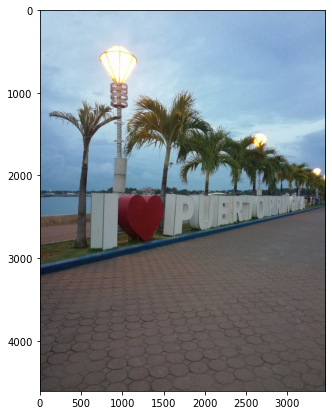

In [2]:
palawan = imread('palawan.jpg')
plt.figure(figsize=(7,7))
plt.imshow(palawan);

Because of the length of the “I ❤ Puerto Princesa” letters, I could not capture it from the front at one shot — thus, I just took the photo from the side. Let’s see if the homography matrix can adjust the perspective of this image from the front.

Let’s define the source plane and the destination plane from the original image. Note that we are doing a trial and error method to determine the coordinates of the plane’s vertices. Thus, this could take some time.

*PRO-TIP: Use the MS Paint application on your personal computer to determine the pixel coordinates of your desired regions in your image.*

In [3]:
area_of_interest = [(500, 600),
                    (3220, 1950),
                    (3220, 2435),
                    (500, 3100)]

area_of_projection = [(100, 1000),
                      (3400, 1000),
                      (3400, 2600),
                      (100, 2600)]

I have created a function that plots the vertices of the `area_of_interest` on the image. This function also displays how the shape of the `area_of_projection` plane.

In [4]:
def project_planes(image, src, dst):
    x_src = [val[0] for val in src] + [src[0][0]]
    y_src = [val[1] for val in src] + [src[0][1]]

    x_dst = [val[0] for val in dst] + [dst[0][0]]
    y_dst = [val[1] for val in dst] + [dst[0][1]]
    
    fig, ax = plt.subplots(1,2, figsize=(13,6))
    
    new_image = image.copy() 
    projection = np.zeros_like(new_image)

    ax[0].imshow(new_image);
    ax[0].plot(x_src, y_src, 'r--')
    ax[0].set_title('Area of Interest')
    ax[1].imshow(projection)
    ax[1].plot(x_dst, y_dst, 'r--')
    ax[1].set_title('Area of Projection')
    plt.tight_layout()

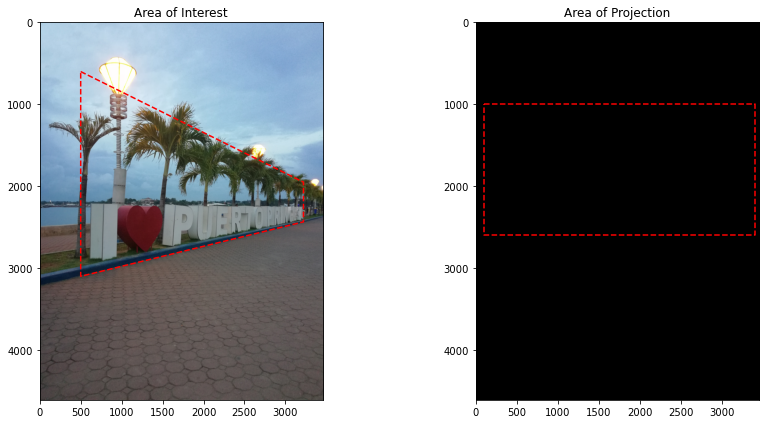

In [5]:
project_planes(palawan, area_of_interest, area_of_projection)

Notice how we mapped the plane on the original image to be wide at the front and narrow towards the back? This is simply because objects will look smaller as their distance is farther away from us. What we want to do is to stretch the area of interest plane to be a rectangular plane.

Now, let’s try to warp the area of interest to fit the area of projection! To do this, I have also created a function that does this.

In [6]:
def project_transform(image, src, dst):
    x_dst = [val[0] for val in dst] + [dst[0][0]]
    y_dst = [val[1] for val in dst] + [dst[0][1]]
    
    tform = transform.estimate_transform('projective', 
                                         np.array(src), 
                                         np.array(dst))
    transformed = transform.warp(image, tform.inverse)
    
    plt.figure(figsize=(6,6))
    plt.imshow(transformed)
    plt.plot(x_dst, y_dst, 'r--')
    plt.tight_layout()

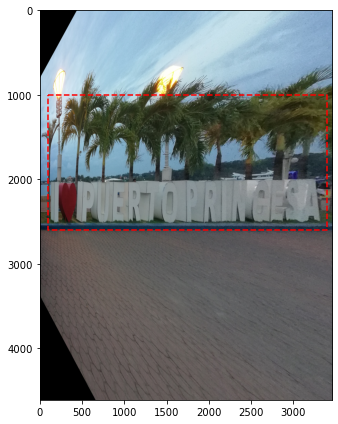

In [7]:
project_transform(palawan, area_of_interest, area_of_projection)

Awesome, *right?* Using the homography matrix, we can pivot the perspective in the image! However, notice how the thickness of the letters increases from left to right. Moreover, notice how even though we are looking at the front-view perspective, we cannot see the spaces in between the letters? This is because the homography matrix merely warps the original image into the projected image. Therefore, it just relies on the information available on the original perspective of the image. This lack of information in the original image explains why the thickness of the letters increases from left to right. It cannot create new information, such as the objects behind the letters to fill in the letters’ gaps. That is why it just stretches the thickness of the letters.

Now, let’s try to look at a different perspective! Say I was walking down alongside these letters. How would it look like?

In [8]:
area_of_interest = [(500, 600),
                    (2500, 1000),
                    (2500, 3500),
                    (500, 3100)]

area_of_projection = [(1000, 1000),
                      (2200, 1000),
                      (2200, 4000),
                      (1000, 4000)]

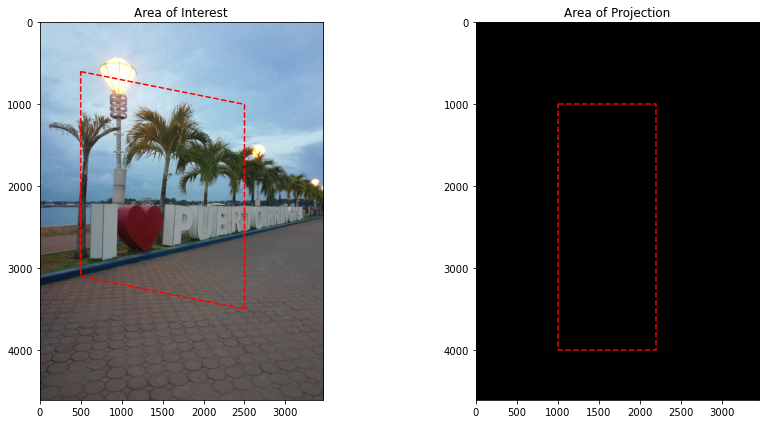

In [9]:
project_planes(palawan, area_of_interest, area_of_projection)

In creating the new plane for this perspective, I used the leftmost edge of the plane in our previous perspective while changing the other three edges. To visualize this, let us imagine that there is a rectangular prism in the image.

<img src='prism.png'>

Notice that we just changed the face of the rectangular prism that we are using as the area of interest plane. Instead of the rectangular prism’s backside face, we are now using the front face of the rectangular prism as the area of interest. Now that you visualized it, let’s project this plane on the destination plane or the area of projection plane!

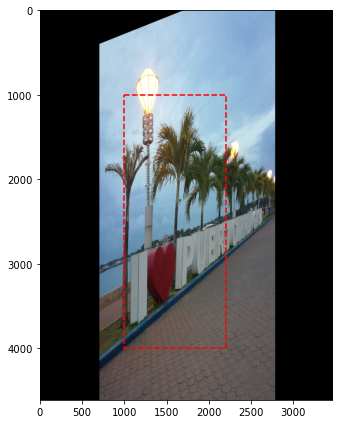

In [10]:
project_transform(palawan, area_of_interest, area_of_projection)

From this perspective, can you imagine that you are walking alongside these letters? Well, *I could!* However, notice that there are lots of black spaces on the edges of the projected image. When we projected the points from the area of interest to the area of projection, the image was stretched. Moreover, remember that this algorithm can only get information from the original image. Since those areas are not in the original image, the algorithm cannot predict what will be in those areas — thus, the blank spaces!

Now, let’s try to take the top-view perspective!

In [11]:
area_of_interest = [(3220, 2450),
                    (3300, 2475),
                    (850, 3200),
                    (500, 3100)]

area_of_projection = [(2000, 1000),
                      (2150, 1000),
                      (2150, 4000),
                      (2000, 4000)]

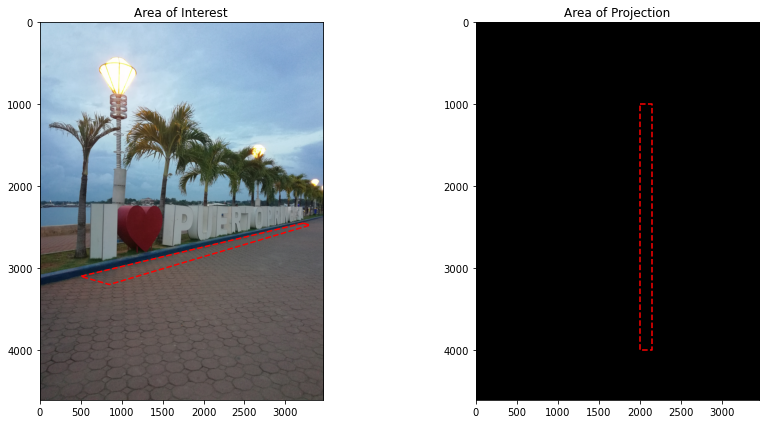

In [12]:
project_planes(palawan, area_of_interest, area_of_projection)

Again, this plane is just the bottom side face of the rectangular prism that we used earlier. Let’s try to stretch it!

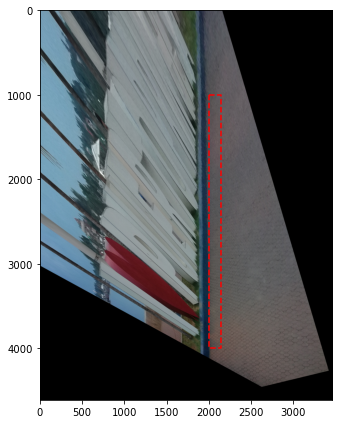

In [13]:
project_transform(palawan, area_of_interest, area_of_projection)

Even though we were able to project the image onto the new points properly, the projected top view of the image looks *unnatural* since we are still not seeing the top side of the letters and the objects behind the letters. However, we should note that that information is not included in the original image so the algorithm just stretches whatever information that it has. This just shows that the homography matrix is the most effective when we have a large area of interest and is almost front-facing the camera perspective in the original image.

*And that’s it!* We have seen the power of warping images using the homography matrix! With this tool, we can indeed have a different perspective from an image. I hope you were able to appreciate the usefulness of the homography matrix and I hope you can now visualize how to use it in your projects!

#### In summary

We have explored how to use the homography matrix to get a different perspective on images. We have shown how powerful the homography matrix in warping images. However, we have also observed its limitations when there is a lack of information in the original image — especially in perspectives that are orthogonal from the original perspective.